In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv(r'D:\Resume Projects\Backpack Prediction Challenge\train.csv',index_col=0)
test_data = pd.read_csv(r'D:\Resume Projects\Backpack Prediction Challenge\test.csv',index_col=0)
sample_submission_data=pd.read_csv(r'D:\Resume Projects\Backpack Prediction Challenge\sample_submission.csv')

In [4]:
train_df=pd.DataFrame(train_data)
test_df=pd.DataFrame(test_data)
sample_submission_data_df=pd.DataFrame(sample_submission_data)

In [5]:
train_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [6]:
test_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
id,,,,,,,,,
300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [7]:
sample_submission_data_df.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


In [8]:
print(train_df.shape)
print(test_df.shape)
print(sample_submission_data_df.shape)

(300000, 10)
(200000, 9)
(200000, 2)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [10]:
train_df.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,299862.000000,300000.000000
mean,5.443590,18.029994,81.411107
std,2.890766,6.966914,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.097867,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.002375,115.018160
max,10.000000,30.000000,150.000000


In [12]:
train_df.isnull().sum()

Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [13]:
test_df.isnull().sum()

Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [14]:
train_df.describe(include='all')

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
count,290295,291653,293405,300000.000000,292556,292950,292030,290050,299862.000000,300000.000000
unique,5,4,3,NaN,2,2,3,6,NaN,NaN
top,Adidas,Polyester,Medium,NaN,Yes,Yes,Messenger,Pink,NaN,NaN
freq,60077,79630,101906,NaN,148342,148077,100031,51690,NaN,NaN
mean,NaN,NaN,NaN,5.443590,NaN,NaN,NaN,NaN,18.029994,81.411107
std,NaN,NaN,NaN,2.890766,NaN,NaN,NaN,NaN,6.966914,39.039340
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,5.000000,15.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,12.097867,47.384620
50%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,18.068614,80.956120
75%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,24.002375,115.018160


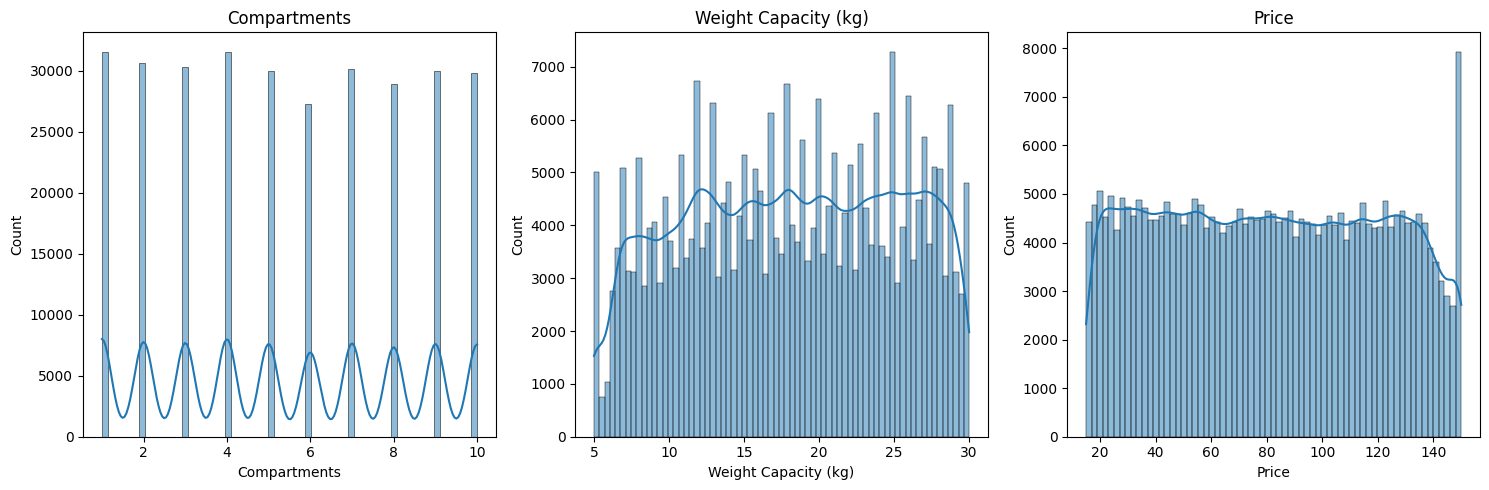

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw histograms for numerical features
plt.figure(figsize=(15, 5))

# Compartments
plt.subplot(1, 3, 1)
sns.histplot(train_df['Compartments'], kde=True)
plt.title('Compartments')

# Weight Capacity (kg)
plt.subplot(1, 3, 2)
sns.histplot(train_df['Weight Capacity (kg)'], kde=True)
plt.title('Weight Capacity (kg)')

# Price
plt.subplot(1, 3, 3)
sns.histplot(train_df['Price'], kde=True)
plt.title('Price')

plt.tight_layout()
plt.show()

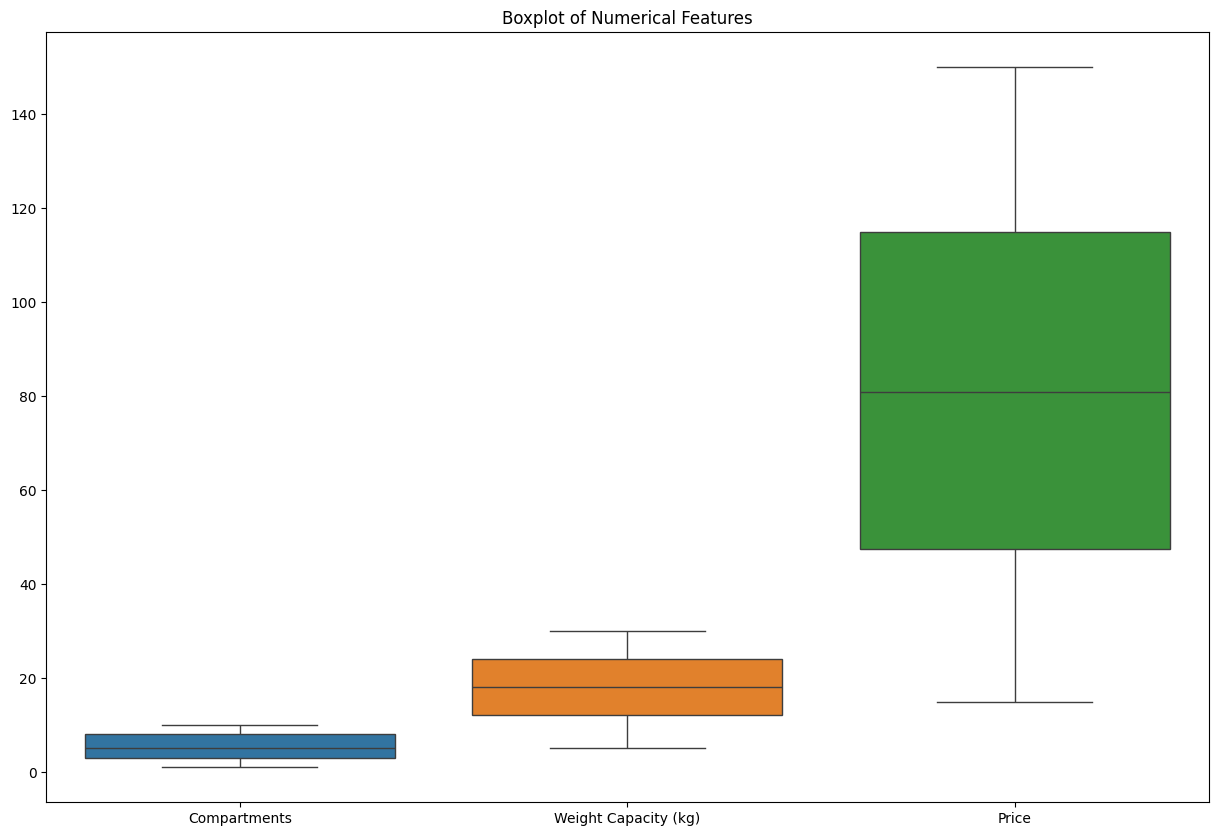

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df[['Compartments', 'Weight Capacity (kg)', 'Price']])
plt.title('Boxplot of Numerical Features')
plt.show()

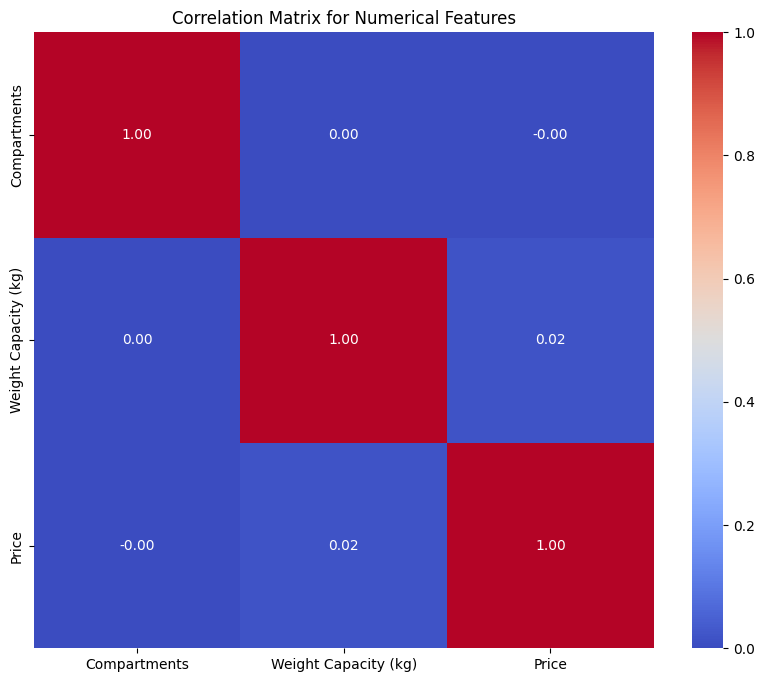

In [18]:
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()